In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [5]:
#Dropping customerId as it is of no use
df=df.drop('customerID',axis=1)

In [6]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
358,Male,1,Yes,No,27,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Credit card (automatic),30.75,805.1,Yes
1682,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,85.25,6083.1,No
686,Male,0,No,No,51,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.60,1266.4,No
2743,Male,0,Yes,No,67,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,111.05,7321.05,No
4523,Male,1,Yes,No,10,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,75.30,720.45,No


In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#TotalCharges is string. But it should be numeric. So lets convert it to numeric. Total charges have certain null values. Lets look at it
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.shape

(7043, 20)

In [11]:
#Lets removethe rows which have total charges as spaces
df1=df[df['TotalCharges']!=' ']

In [12]:
df1.shape

(7032, 20)

In [14]:
#Converting total charges to numeric
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'])

C:\Users\91999\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Data Visualisation

In [17]:
#Lets look which customers churn most based on their tenure
tenure_churn_no=df1[df1['Churn']=='No'].tenure
tenure_churn_yes=df1[df1['Churn']=='Yes'].tenure

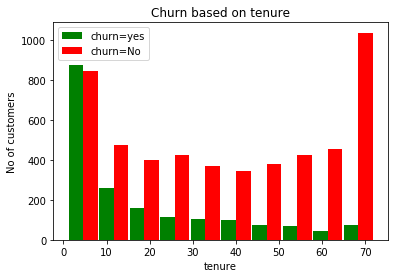

In [19]:
plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.title('Churn based on tenure')
plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,color=['green','red'],label=['churn=yes','churn=No'])
plt.legend()

From the above graph we could see that most of the customers who got churned have very less tenure of few months

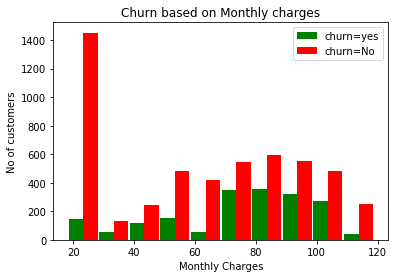

In [20]:
#Lets look which customers churn most based on their tenure
mc_churn_no=df1[df1['Churn']=='No'].MonthlyCharges
mc_churn_yes=df1[df1['Churn']=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('No of customers')
plt.title('Churn based on Monthly charges')
plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['churn=yes','churn=No'])
plt.legend()

Customers who get more monthly charges get churned more

Lets print unique values in object columns to see their values

In [23]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') 

In [24]:
unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [25]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\91999\anaconda3\lib\site-packages\pandas\core\frame.py:4384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [26]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']


In [28]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\91999\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [30]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [29]:
unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [31]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [32]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [33]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

## Feature Scaling

In [34]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [35]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [40]:
X = df2.drop('Churn',axis='columns')
y = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [49]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [51]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = Sequential([
        Dense(26, input_dim=26, activation='relu'),
        Dense(15, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
        
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [55]:
X_train.shape

(5625, 26)

In [53]:
from sklearn.metrics import confusion_matrix , classification_report

In [54]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5053 - accuracy: 0.7586
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7945
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.7963
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.7982
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.7993
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8023
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8007
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8021
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8057
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4085 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8240
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.8277
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8258
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8292
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8263
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8251
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8283
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8276
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8283
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 

In [56]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [60]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5394 - accuracy: 0.7374
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.7780
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4648 - accuracy: 0.7768
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4594 - accuracy: 0.7823
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4542 - accuracy: 0.7872
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.7887
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4451 - accuracy: 0.7923
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.7933
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4385 - accuracy: 0.7959
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4345 - accura

Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.8522
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8536
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8530
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3407 - accuracy: 0.8539
Epoch 85/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8490
Epoch 86/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8507
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8565
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8489
Epoch 89/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8546
Epoch 90/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3389

After resampling using SMOTE our F1 score have increased significantly